In [114]:
import pandas as pd
import numpy as np
import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
colonnes_selectionnees = [
    # Identifiants et démographie
    'ID',
    'Sexe',
    'Age',

    # Variables cliniques critiques
    'Créatinine (mg/L)',
    'Urée (g/L)',
    'Protéinurie',
    'Protéinurie à la bandellette urinaire (g/24h)',
    'TA (mmHg)/Systole',
    'TA (mmHg)/Diastole',

    # Comorbidités
    'Personnels Médicaux/HTA',
    'Personnels Médicaux/Diabète 1',
    'Personnels Médicaux/Diabète 2',
    'Personnels Médicaux/IRC',
    'Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)',

    # Symptômes clés
    "Motif(s) d'Admission/Œdème",
    'Symptômes/Oligurie',
    'Symptômes/Asthénie',
    'Symptômes/Nausées',
    'Symptômes/Vomissements',
    'Symptômes/Perte de poids',
    'Etat Général (EG)/OMI',

    # Anthropométrie
    'Poids (Kg)',
    'Taille (m)',
    'IMC',

    # Biologie
    'Hb (g/dL)',
    'Hte (%)',
    'Na^+ (meq/L)',
    'K^+ (meq/L)',
    'Ca^2+ (meq/L)',

    # Données échographiques
    'Grosseur Rein Gauche ',
    'Grosseur Rein Droit ',
    'Echogénicité',
    'Contour régulier/Rein droit',
    'Contour régulier/Rein gauche',

    # Stade IRC (si disponible)
    "Stage de l'IRC"
]


In [116]:
df_red=pd.read_csv("ai4ckd_red.csv")

In [117]:
df_red.head()

,Unnamed: 0,ID,Sexe,Age,Créatinine (mg/L),Urée (g/L),Protéinurie,Protéinurie à la bandellette urinaire (g/24h),TA (mmHg)/Systole,TA (mmHg)/Diastole,...,Hte (%),Na^+ (meq/L),K^+ (meq/L),Ca^2+ (meq/L),Grosseur Rein Gauche,Grosseur Rein Droit,Echogénicité,Contour régulier/Rein droit,Contour régulier/Rein gauche,Stage de l'IRC
0,0,1,F,50,169,"1,29",Négative,NaN,140,80,...,"32,4",131,"6,4",82,NaN,NaN,NaN,NaN,NaN,CKD 5
1,1,2,M,28,17,"0,66",3+,NaN,130,80,...,"30,6",134,"5,3",NaN,Normal,Normal,Hyper Echogénicité,Oui,Oui,CKD 5
2,2,3,F,69,48,"0,79",Négative,NaN,93,34,...,"28,1",139,"3,4",87,NaN,NaN,NaN,NaN,NaN,CKD 5
3,3,4,M,68,42,"1,14",3+,NaN,130,70,...,"24,4",142,"5,7",88,NaN,NaN,NaN,NaN,NaN,CKD 5
4,4,5,F,68,500,NaN,3+,NaN,225,111,...,"28,1",NaN,NaN,NaN,Normal,Normal,Homogénéité,Oui,Oui,CKD 5


In [118]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 36 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Unnamed: 0                                                                      309 non-null    int64 
 1   ID                                                                              307 non-null    object
 2   Sexe                                                                            299 non-null    object
 3   Age                                                                             300 non-null    object
 4   Créatinine (mg/L)                                                               307 non-null    object
 5   Urée (g/L)                                                                      284 non-null    object
 6   Protéinurie               

In [119]:
df=df_red.copy()

In [120]:

#Standardisation noms de colonnes en minuscules sans espaces et en format string
columns=list()
for col in df.columns.to_list():
  columns.append(str(col).lower().strip())
df.columns=columns
df.columns





Index(['unnamed: 0', 'id', 'sexe', 'age', 'créatinine (mg/l)', 'urée (g/l)',
       'protéinurie', 'protéinurie à la bandellette urinaire (g/24h)',
       'ta (mmhg)/systole', 'ta (mmhg)/diastole', 'personnels médicaux/hta',
       'personnels médicaux/diabète 1', 'personnels médicaux/diabète 2',
       'personnels médicaux/irc',
       'personnels médicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)',
       'motif(s) d'admission/œdème', 'symptômes/oligurie',
       'symptômes/asthénie', 'symptômes/nausées', 'symptômes/vomissements',
       'symptômes/perte de poids', 'etat général (eg)/omi', 'poids (kg)',
       'taille (m)', 'imc', 'hb (g/dl)', 'hte (%)', 'na^+ (meq/l)',
       'k^+ (meq/l)', 'ca^2+ (meq/l)', 'grosseur rein gauche',
       'grosseur rein droit', 'echogénicité', 'contour régulier/rein droit',
       'contour régulier/rein gauche', 'stage de l'irc'],
      dtype='object')

In [121]:
df.drop(["id","unnamed: 0"],axis=1,inplace=True) # Suppression des colonnes id,unnamed

In [122]:
df["stage de l'irc"].value_counts()

,count
stage de l'irc,
CKD 5,60
CKD 2,52
CKD 4,50
CKD 3a,49
CKD 3b,49
CKD 1,46
0%,1


In [123]:
# Convertit le stade de l'IRC en entier (1-5) si un chiffre est présent, sinon retourne NaN
def stage_to_int(stage):
  if "1" in str(stage):
    return int(1)
  elif "2" in str(stage):
    return int(2)
  elif "3" in str(stage):
    return int(3)
  elif "4" in str(stage):
    return int(4)
  elif "5" in str(stage):
    return int(5)
  else:
    return np.nan

df["stage de l'irc"] = df["stage de l'irc"].apply(stage_to_int)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 34 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   sexe                                                                            299 non-null    object 
 1   age                                                                             300 non-null    object 
 2   créatinine (mg/l)                                                               307 non-null    object 
 3   urée (g/l)                                                                      284 non-null    object 
 4   protéinurie                                                                     62 non-null     object 
 5   protéinurie à la bandellette urinaire (g/24h)                                   66 non-null     object 
 6   ta (mmhg)/systole 

In [125]:
df["imc"].value_counts()

,count
imc,
Normal,54
Obese,39
Overweight,33
Extremly Obese,7
Underweight,4
55%,1


In [126]:
df["urée (g/l)"]

,urée (g/l)
0,"1,29"
1,"0,66"
2,"0,79"
3,"1,14"
4,NaN
...,...
304,"0,49"
305,NaN
306,NaN
307,NaN


In [127]:
#CONVERSION des données numeriques en format adequat
colonnes_numeriques = ['age', 'créatinine (mg/l)', 'urée (g/l)',
                      'ta (mmhg)/systole', 'ta (mmhg)/diastole',
                      'poids (kg)', 'taille (m)','hb (g/dl)', 'hte (%)',
                      'na^+ (meq/l)', 'k^+ (meq/l)', 'ca^2+ (meq/l)']

for col in colonnes_numeriques:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [128]:
# Mapping de la colonne protéinurie en valeurs numériques
mapping_proteinurie = {
    'Négatif': 0,
    'Trace': 0.5,
    '1+': 1,
    '2+': 2,
    '3+': 3,
    '> 3+': 4
}

df['protéinurie'] = df['protéinurie'].map(mapping_proteinurie)

In [129]:
# Convertir en valeurs continues approximatives (point milieu de l'intervalle)
mapping_valeurs_centrales = {
    '<=1': 0.5,   # Centre approximatif de l'intervalle 0-1
    ']1;2]': 1.5, # Centre de l'intervalle 1-2
    ']2;3]': 2.5, # Centre de l'intervalle 2-3
    '>3': 4.0     # Valeur représentative pour >3
}

df['protéinurie à la bandellette urinaire (g/24h)'] = df['protéinurie à la bandellette urinaire (g/24h)'].map(mapping_valeurs_centrales)

Traitement des valeurs manquantes

<Axes: >

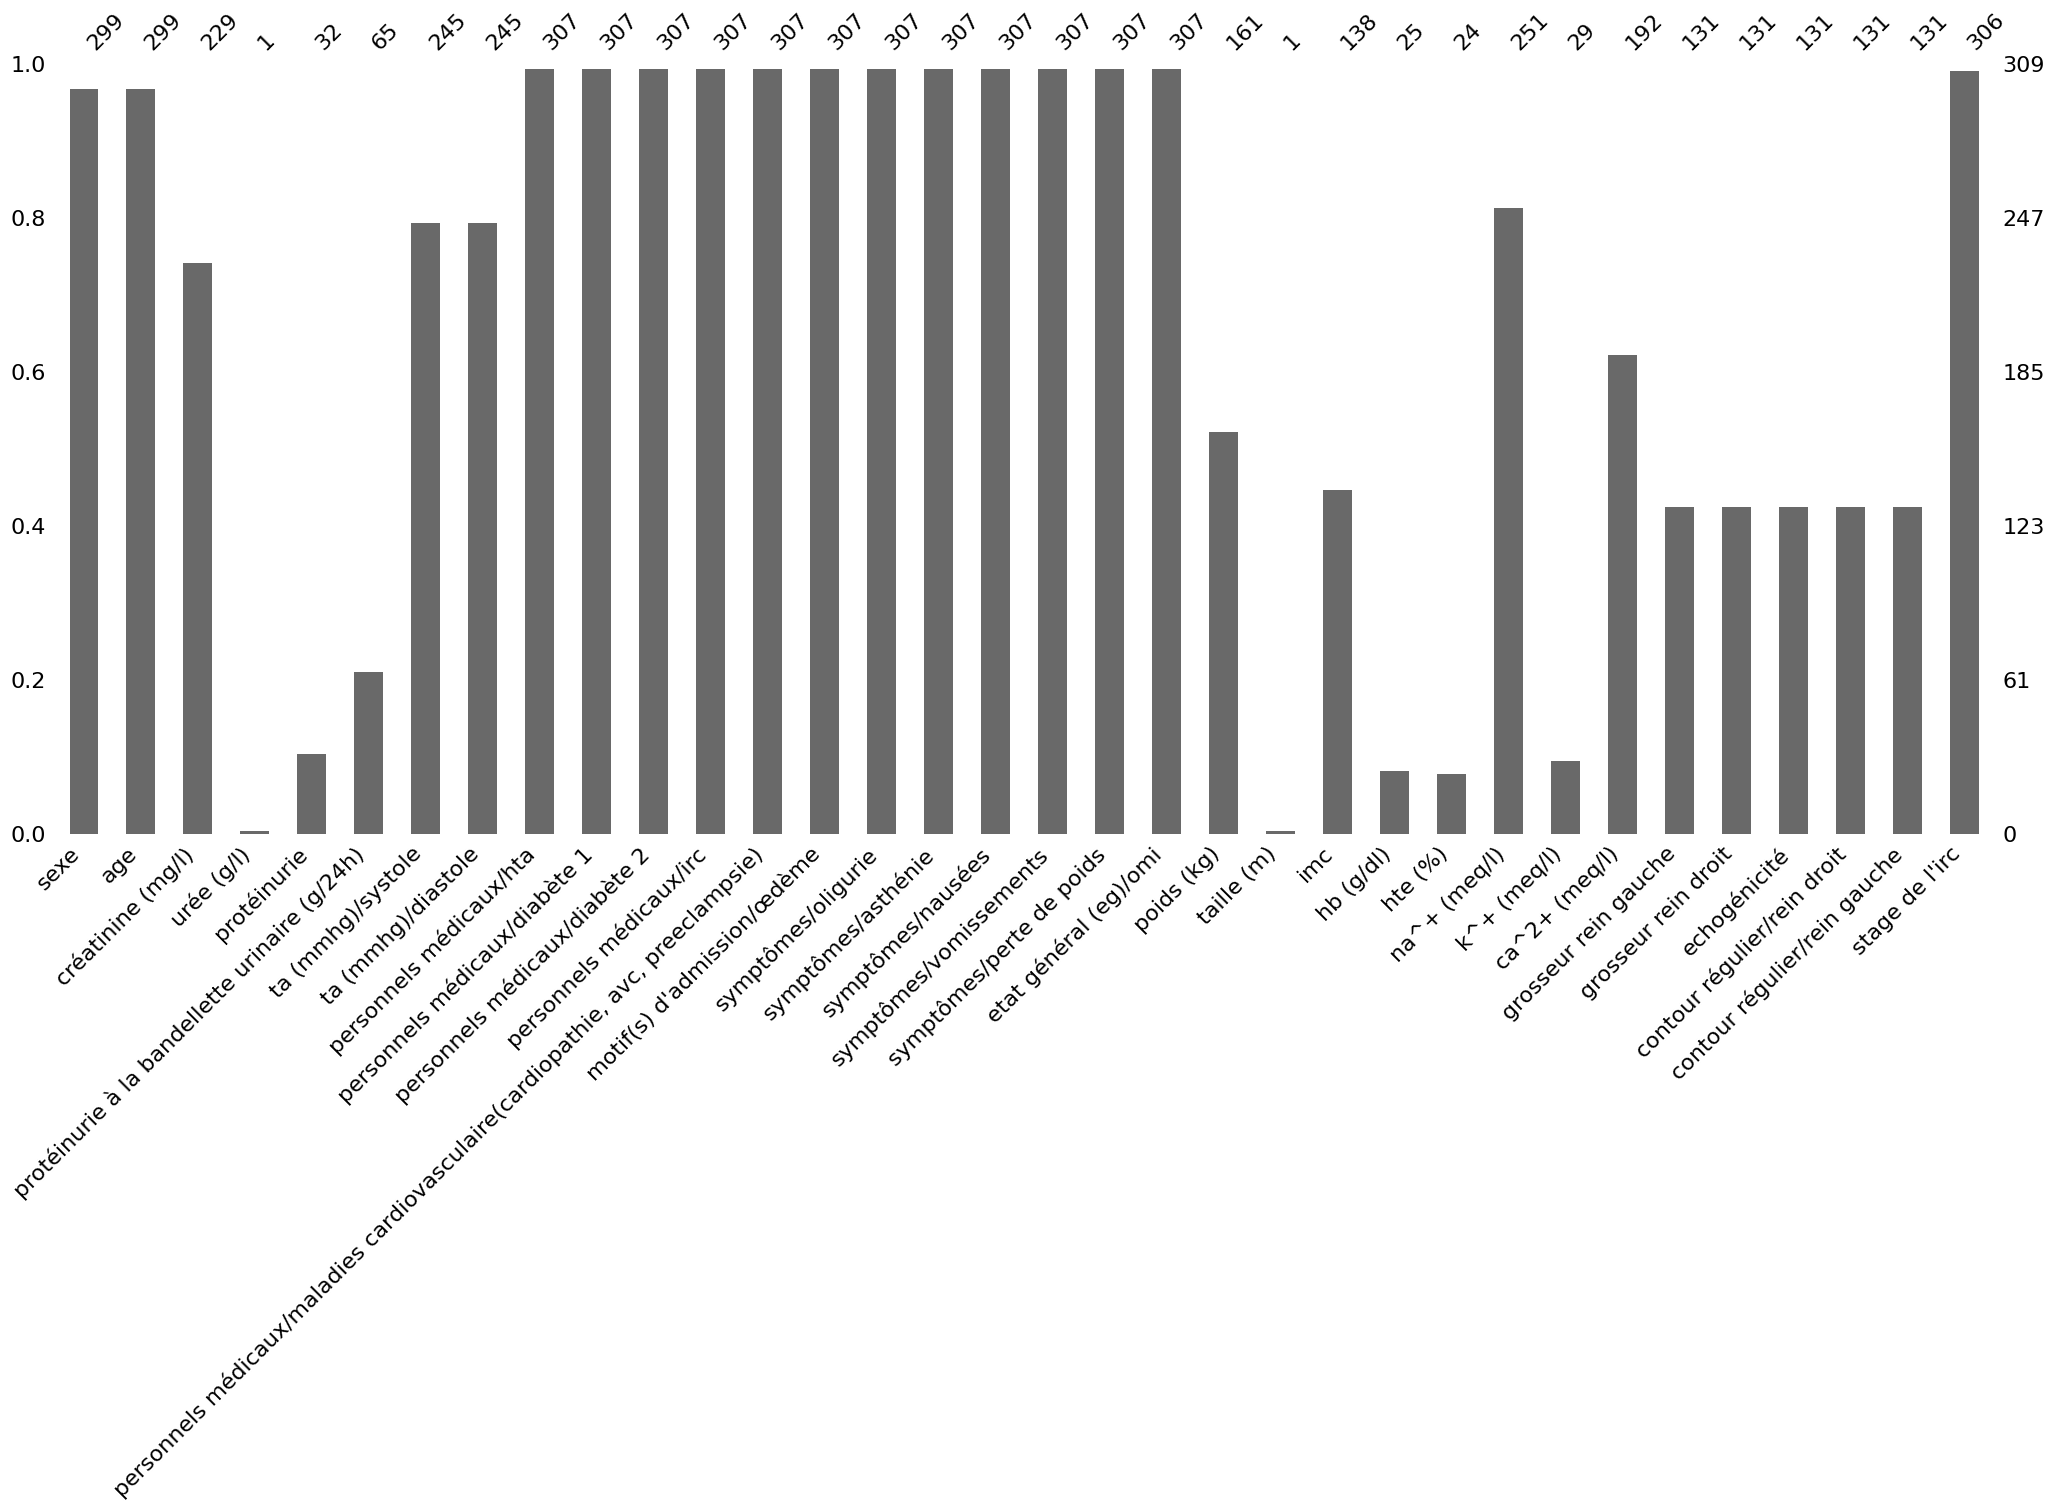

In [130]:
mno.bar(df)

 ## L’imputation de colonnes ['urée (g/l)', 'taille (m)', 'poids (kg)','protéinurie à la bandellette urinaire (g/24h)',"protéinurie","hb (g/dl)","hte (%)","k^+ (meq/l)"] representant des variables normalement diagnostiquées par des tests de laboratoire est une décision critique.Deplus ces colonnes ne contiennent pas assez de données repesentative pour imputer.

In [131]:
df.drop(['urée (g/l)', 'taille (m)', 'poids (kg)','protéinurie à la bandellette urinaire (g/24h)',"protéinurie","hb (g/dl)","hte (%)","k^+ (meq/l)"], axis=1, inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 26 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   sexe                                                                            299 non-null    object 
 1   age                                                                             299 non-null    float64
 2   créatinine (mg/l)                                                               229 non-null    float64
 3   ta (mmhg)/systole                                                               245 non-null    float64
 4   ta (mmhg)/diastole                                                              245 non-null    float64
 5   personnels médicaux/hta                                                         307 non-null    object 
 6   personnels médicau

In [133]:
# Imputation des valeurs manquantes par type de variable
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Variables catégorielles : mode

for col in ["age", "stage de l'irc"]:
    df[col].fillna(df[col].median(), inplace=True)  # Variables ordinales : médiane

num_cols = ['créatinine (mg/l)', 'ta (mmhg)/systole', 'ta (mmhg)/diastole',
            'na^+ (meq/l)', 'ca^2+ (meq/l)']
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)  # Variables numériques continues : moyenne

<ipython-input-133-3a46bba844e7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Variables catégorielles : mode
<ipython-input-133-3a46bba844e7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [134]:
df.isna().sum()

,0
sexe,0
age,0
créatinine (mg/l),0
ta (mmhg)/systole,0
ta (mmhg)/diastole,0
personnels médicaux/hta,0
personnels médicaux/diabète 1,0
personnels médicaux/diabète 2,0
personnels médicaux/irc,0
"personnels médicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)",0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 26 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   sexe                                                                            309 non-null    object 
 1   age                                                                             309 non-null    float64
 2   créatinine (mg/l)                                                               309 non-null    float64
 3   ta (mmhg)/systole                                                               309 non-null    float64
 4   ta (mmhg)/diastole                                                              309 non-null    float64
 5   personnels médicaux/hta                                                         309 non-null    object 
 6   personnels médicau

In [136]:
colonnes_contenant_3 = df.columns[df.isin(["3%"]).any()]

# Supprimer les lignes contenant "3%" dans ces colonnes
df = df[~df[colonnes_contenant_3].isin(["3%"]).any(axis=1)]

# Taux de creantine VS Stade de l'IRC

In [137]:
# Fonction pour détecter et traiter les valeurs aberrantes dans les colonnes numériques
def traiter_valeurs_aberrantes(df, columns, method='cap'):
    df_processed = df.copy()

    for column in columns:
        if column in df.columns and df[column].dtype in ['float64', 'float32', 'int64', 'int32']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            if method == 'cap':
                # Plafonner les valeurs aberrantes
                df_processed[column] = df_processed[column].clip(lower=lower_bound, upper=upper_bound)
            elif method == 'nan':
                # Convertir les valeurs aberrantes en NaN (pour imputation ultérieure)
                mask = (df_processed[column] < lower_bound) | (df_processed[column] > upper_bound)
                df_processed.loc[mask, column] = np.nan

    return df_processed

In [138]:
df=traiter_valeurs_aberrantes(df, columns=["créatinine (mg/l)","ta (mmhg)/systole","ta (mmhg)/diastole"], method='cap')

In [139]:
df["créatinine (mg/l)"].max()

99.8886462882096

# FEATURES ENGINEERING

## Calculer le Débit de filtration glomérulaire estimé (DFGe)
### Équation de la créatinine du MRC-EPI (2009)

### Il s'agit de la méthode principale et la plus recommandée. Elle utilise un seul résultat d'analyse de sang pour la créatinine.

### DFGe = 141 × min(SCr/k, 1)α × max(SCr/k, 1)-1,209 × 0,993 âge × a × b

### où :

### α – coefficient dépendant du sexe : -0,329 pour les femmes, -0,411 pour les hommes
### k – coefficient dépendant du sexe : 0,7 pour les femmes, 0,9 pour les hommes
### a – coefficient dépendant du sexe : 1,018 pour les femmes, 1 pour les hommes
### b – coefficient dépendant de l'ethnicité : 1,159 pour les individus d'origine africaine, 1 pour les autres
### SCr – niveau de créatinine sérique standardisée en mg⋅dL⁻¹

In [140]:
df.dropna(axis=0,inplace=True)

In [141]:
def calculer_dfge(df, race_noire=True):
    """
    Calcule le Débit de Filtration Glomérulaire estimé (DFGe) selon la formule CKD-EPI
    pour chaque ligne d'un DataFrame pandas.

    Paramètres:
    df (pandas.DataFrame): DataFrame contenant les colonnes 'age', 'sexe' et 'créatinine (mg/l)'
    race_noire (bool): True si le patient est de race noire, False sinon

    Retourne:
    pandas.Series: Série contenant les valeurs de DFGe calculées pour chaque ligne
    """

    # Extraction des colonnes
    age = df['age']
    sexe = df['sexe']
    creatinine = df['créatinine (mg/l)']

    # Conversion de mg/L en mg/dL (division par 10)
    creatinine_mg_dl = creatinine / 10

    # Création des arrays pour les paramètres qui varient selon le sexe
    k = np.where(sexe.str.upper() == 'F', 0.7, 0.9)
    alpha = np.where(sexe.str.upper() == 'F', -0.329, -0.411)
    a = np.where(sexe.str.upper() == 'F', 1.018, 1.0)

    # Facteur de correction pour la race noire
    b = 1.159 if race_noire else 1.0

    # Calcul vectorisé des termes
    ratio = creatinine_mg_dl / k
    min_term = np.power(np.minimum(ratio, 1), alpha)
    max_term = np.power(np.maximum(ratio, 1), -1.209)
    age_factor = np.power(0.993, age)

    # Calcul final du DFGe
    dfge = 141 * min_term * max_term * age_factor * a * b

    return dfge.round(2)

In [142]:
df['dfge'] = calculer_dfge(df)

In [143]:
df.head()

,sexe,age,créatinine (mg/l),ta (mmhg)/systole,ta (mmhg)/diastole,personnels médicaux/hta,personnels médicaux/diabète 1,personnels médicaux/diabète 2,personnels médicaux/irc,"personnels médicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)",...,imc,na^+ (meq/l),ca^2+ (meq/l),grosseur rein gauche,grosseur rein droit,echogénicité,contour régulier/rein droit,contour régulier/rein gauche,stage de l'irc,dfge
0,F,50.0,99.888646,140.000,80.000,1,0,0,1,0,...,Normal,131.000000,82.000000,Normal,Normal,Homogénéité,Oui,Oui,5.0,4.71
1,M,28.0,17.000000,130.000,80.000,0,0,0,0,0,...,Normal,134.000000,91.942708,Normal,Normal,Hyper Echogénicité,Oui,Oui,5.0,62.22
2,F,69.0,48.000000,93.000,52.875,1,0,1,1,0,...,Normal,139.000000,87.000000,Normal,Normal,Homogénéité,Oui,Oui,5.0,9.99
3,M,68.0,42.000000,130.000,70.000,0,0,0,0,0,...,Normal,142.000000,88.000000,Normal,Normal,Homogénéité,Oui,Oui,5.0,15.74
4,F,68.0,99.888646,184.875,111.000,1,0,0,1,0,...,Normal,138.083665,91.942708,Normal,Normal,Homogénéité,Oui,Oui,5.0,4.15


Text(0.5, 1.0, "Taux de creantine VS Stade de l'IRC")

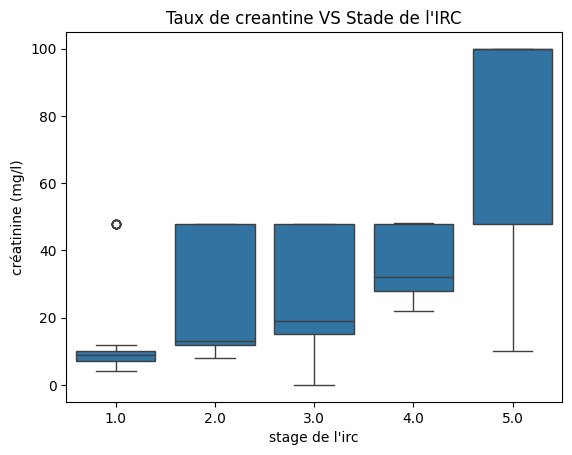

In [144]:
# Create the boxplot and get the Axes object
ax = sns.boxplot(x="stage de l'irc", y='créatinine (mg/l)', data=df)

# Set the title using the Axes object
ax.set_title("Taux de creantine VS Stade de l'IRC")

<Axes: xlabel="stage de l'irc", ylabel='dfge'>

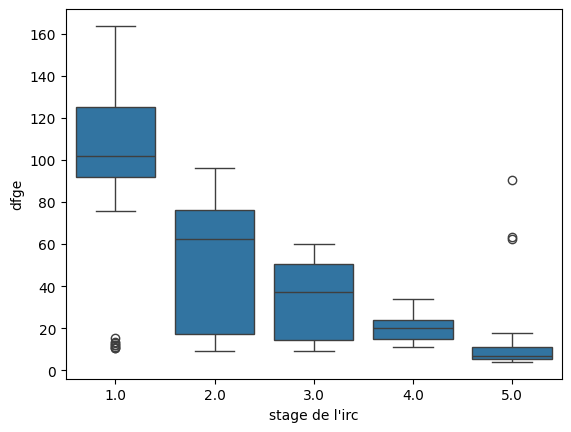

In [145]:
sns.boxplot(y="dfge", x="stage de l'irc", data=df)

In [146]:
df.dfge

,dfge
0,4.71
1,62.22
2,9.99
3,15.74
4,4.15
...,...
303,45.27
304,54.92
305,46.15
306,14.56


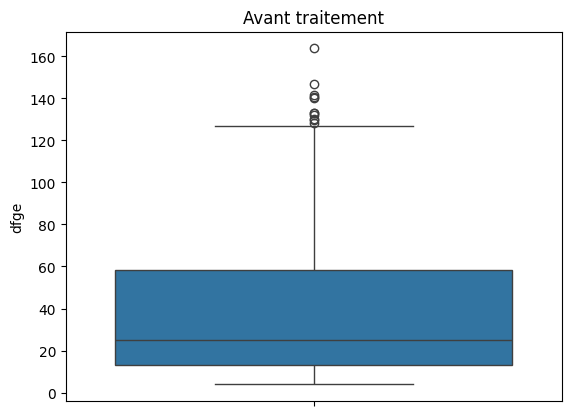

In [147]:
plt.title('Avant traitement')
ax=sns.boxplot(df['dfge'])

In [148]:
# gestion des valeurs aberrantes de la colonnes calculé (dfge)
df=traiter_valeurs_aberrantes(df, columns=["dfge"], method='cap')

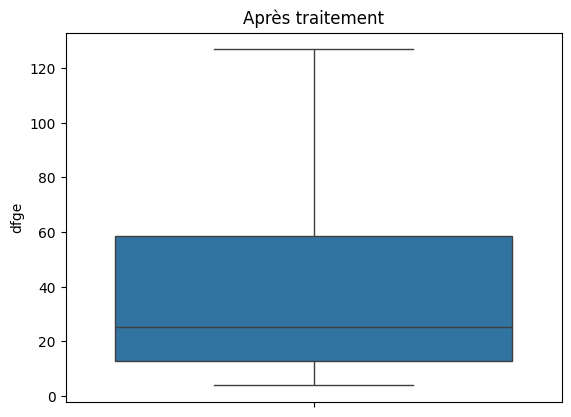

In [149]:
plt.title('Après traitement')
ax=sns.boxplot(df['dfge'])

# Statistique descriptive sur les colonnes

In [150]:
categorical_columns=df.select_dtypes(include="object").columns.to_list()
numerical_columns=df.select_dtypes(exclude="object").columns.to_list()

print(categorical_columns)

['sexe', 'personnels médicaux/hta', 'personnels médicaux/diabète 1', 'personnels médicaux/diabète 2', 'personnels médicaux/irc', 'personnels médicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)', "motif(s) d'admission/œdème", 'symptômes/oligurie', 'symptômes/asthénie', 'symptômes/nausées', 'symptômes/vomissements', 'symptômes/perte de poids', 'etat général (eg)/omi', 'imc', 'grosseur rein gauche', 'grosseur rein droit', 'echogénicité', 'contour régulier/rein droit', 'contour régulier/rein gauche']


In [151]:
df[categorical_columns].describe()

,sexe,personnels médicaux/hta,personnels médicaux/diabète 1,personnels médicaux/diabète 2,personnels médicaux/irc,"personnels médicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)",motif(s) d'admission/œdème,symptômes/oligurie,symptômes/asthénie,symptômes/nausées,symptômes/vomissements,symptômes/perte de poids,etat général (eg)/omi,imc,grosseur rein gauche,grosseur rein droit,echogénicité,contour régulier/rein droit,contour régulier/rein gauche
count,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,5,3,3,3,2,2
top,M,1,0,0,0,0,0,0,0,0,0,0,0,Normal,Normal,Normal,Homogénéité,Oui,Oui
freq,160,242,303,214,279,274,279,292,220,290,262,297,207,225,267,269,277,305,307


In [152]:
df[numerical_columns].describe()

,age,créatinine (mg/l),ta (mmhg)/systole,ta (mmhg)/diastole,na^+ (meq/l),ca^2+ (meq/l),stage de l'irc,dfge
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,54.753247,36.060625,139.798493,83.279557,138.083665,91.942708,3.084416,39.820195
std,14.824846,28.696279,22.366753,14.843078,6.938361,6.634813,1.306218,34.657240
min,18.000000,0.000000,91.875000,52.875000,60.000000,62.000000,1.000000,3.950000
25%,44.750000,13.000000,126.750000,75.750000,138.000000,89.000000,2.000000,12.987500
50%,57.000000,27.000000,138.391837,82.130612,139.000000,91.942708,3.000000,25.190000
75%,66.000000,47.755459,150.000000,91.000000,141.000000,95.000000,4.000000,58.527500
max,88.000000,99.888646,184.875000,113.875000,148.000000,120.000000,5.000000,126.837500


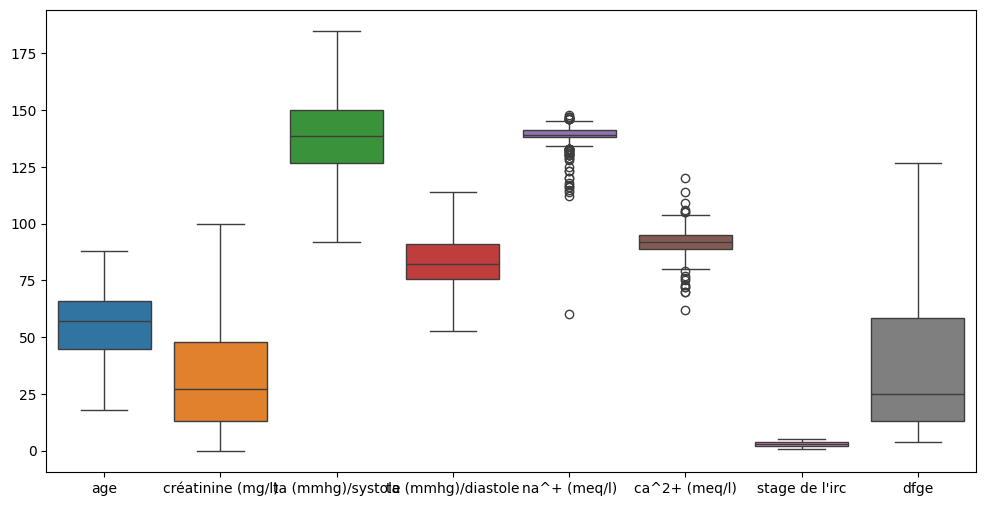

In [153]:
# Vérification des valeurs aberrantes
plt.figure(figsize=(12, 6))
ax=sns.boxplot(df[numerical_columns])


# Etude de relation entre les colonnes quantitatives

### Methode avec la matrice de corrélation

In [154]:
df[numerical_columns].corr()

,age,créatinine (mg/l),ta (mmhg)/systole,ta (mmhg)/diastole,na^+ (meq/l),ca^2+ (meq/l),stage de l'irc,dfge
age,1.000000,-0.238438,0.013561,-0.183807,0.172576,0.198875,-0.061496,-0.068344
créatinine (mg/l),-0.238438,1.000000,0.181308,0.212251,-0.397909,-0.353587,0.689068,-0.740616
ta (mmhg)/systole,0.013561,0.181308,1.000000,0.747282,-0.017553,-0.112186,0.233869,-0.165476
ta (mmhg)/diastole,-0.183807,0.212251,0.747282,1.000000,0.027918,-0.098339,0.179931,-0.126043
na^+ (meq/l),0.172576,-0.397909,-0.017553,0.027918,1.000000,0.200381,-0.275400,0.213589
ca^2+ (meq/l),0.198875,-0.353587,-0.112186,-0.098339,0.200381,1.000000,-0.344269,0.240102
stage de l'irc,-0.061496,0.689068,0.233869,0.179931,-0.275400,-0.344269,1.000000,-0.717581
dfge,-0.068344,-0.740616,-0.165476,-0.126043,0.213589,0.240102,-0.717581,1.000000


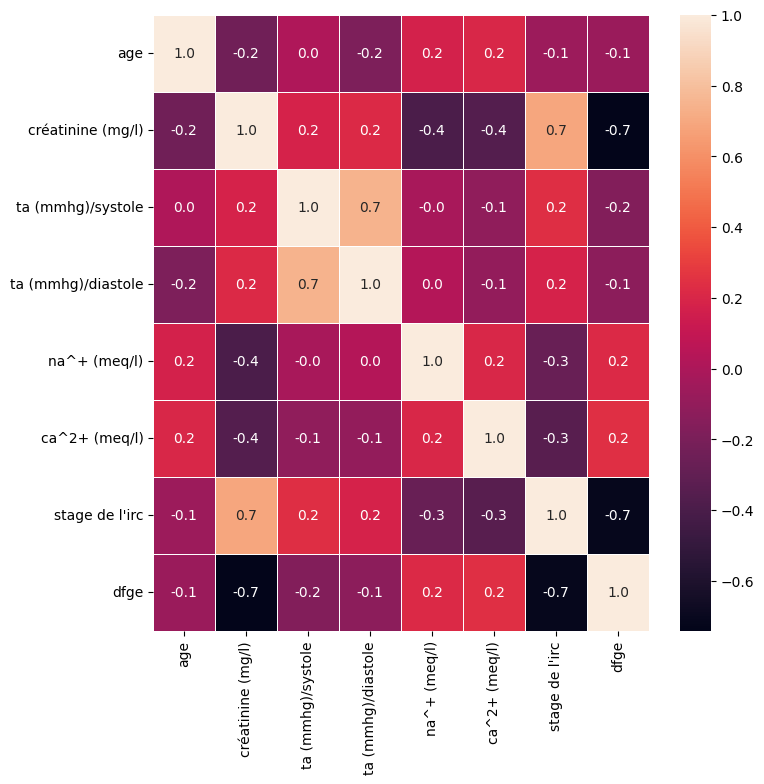

In [155]:
#correlation map
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

##  Corrélations avec la variable cible : `stage de l'irc`

| Variable                | Corrélation avec le stade de l’IRC | Interprétation |
|------------------------|-------------------------------------|----------------|
| **Créatinine (mg/l)**  | **+0.7**                            | Très forte corrélation positive : plus la créatinine augmente, plus le stade de l’IRC est avancé. Excellent prédicteur. |
| **DFG (dfge)**          | **-0.7**                            | Corrélation négative très forte : plus le DFG diminue, plus le stade est avancé. Indicateur clinique majeur. |
| **Na⁺ (meq/l)**         | -0.3                                | Corrélation négative modérée. Une baisse de sodium peut accompagner la progression de l’IRC. |
| **Ca²⁺ (meq/l)**        | -0.3                                | Même logique que le sodium : l’hypocalcémie est fréquente dans les stades avancés. |
| **TA (systole/diastole)** | +0.2                            | Corrélation faible : l’hypertension est un facteur de risque et une conséquence. |
| **Âge**                 | -0.1                                | Corrélation faible et peu significative. |

---

##  Corrélations entre variables explicatives (multicolinéarité)

| Variables corrélées               | Corrélation | Remarques |
|----------------------------------|-------------|-----------|
| Créatinine - DFG                 | **-0.7**    | Attendu, car le DFG est calculé à partir de la créatinine. |
| TA systolique - TA diastolique  | **+0.7**    | Forte association naturelle entre les deux mesures. |
| Autres (électrolytes, âge, etc.) | < ±0.4      | Pas de forte redondance, mais attention au cumul. |

>  **À noter** : En cas d’utilisation de modèles sensibles à la colinéarité (ex : régression linéaire), il faudra faire attention à ne pas inclure simultanément des variables très corrélées comme `créatinine` et `dfge`.

---

# Etude de relation entre les colonnes qualitatives

In [156]:
for col in categorical_columns:
  print(col,":",df[col].unique())

sexe : ['F' 'M']
personnels médicaux/hta : ['1' '0']
personnels médicaux/diabète 1 : ['0' '1']
personnels médicaux/diabète 2 : ['0' '1']
personnels médicaux/irc : ['1' '0']
personnels médicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie) : ['0' '1']
motif(s) d'admission/œdème : ['0' '1']
symptômes/oligurie : ['0' '1']
symptômes/asthénie : ['0' '1']
symptômes/nausées : ['0' '1']
symptômes/vomissements : ['0' '1']
symptômes/perte de poids : ['0' '1']
etat général (eg)/omi : ['0' '1']
imc : ['Normal' 'Underweight' 'Obese' 'Overweight' 'Extremly Obese']
grosseur rein gauche : ['Normal' 'Augmenté' 'Réduit']
grosseur rein droit : ['Normal' 'Augmenté' 'Réduit']
echogénicité : ['Homogénéité' 'Hyper Echogénicité' 'Hypo Echogénicité']
contour régulier/rein droit : ['Oui' 'Non']
contour régulier/rein gauche : ['Oui' 'Non']


### Analyser les relations entre LES variables catégorielles et la variable cible (stage de l'IRC)

In [157]:
for col in categorical_columns:
  print(col,":",df[col].unique())

sexe : ['F' 'M']
personnels médicaux/hta : ['1' '0']
personnels médicaux/diabète 1 : ['0' '1']
personnels médicaux/diabète 2 : ['0' '1']
personnels médicaux/irc : ['1' '0']
personnels médicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie) : ['0' '1']
motif(s) d'admission/œdème : ['0' '1']
symptômes/oligurie : ['0' '1']
symptômes/asthénie : ['0' '1']
symptômes/nausées : ['0' '1']
symptômes/vomissements : ['0' '1']
symptômes/perte de poids : ['0' '1']
etat général (eg)/omi : ['0' '1']
imc : ['Normal' 'Underweight' 'Obese' 'Overweight' 'Extremly Obese']
grosseur rein gauche : ['Normal' 'Augmenté' 'Réduit']
grosseur rein droit : ['Normal' 'Augmenté' 'Réduit']
echogénicité : ['Homogénéité' 'Hyper Echogénicité' 'Hypo Echogénicité']
contour régulier/rein droit : ['Oui' 'Non']
contour régulier/rein gauche : ['Oui' 'Non']


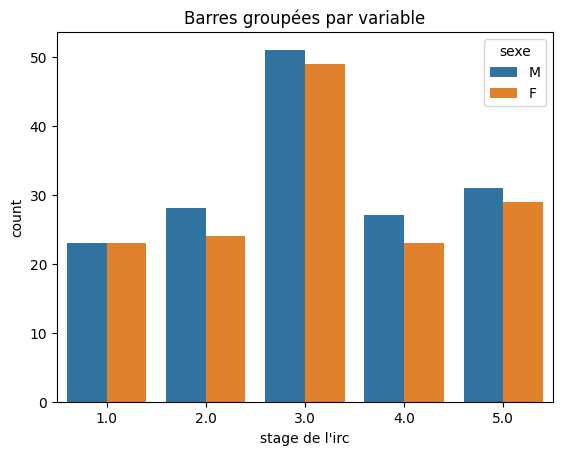

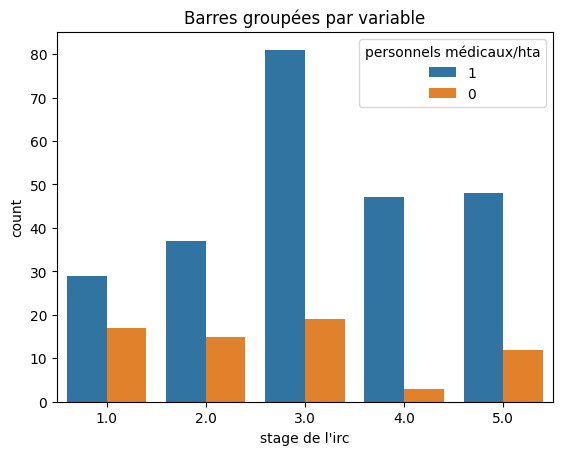

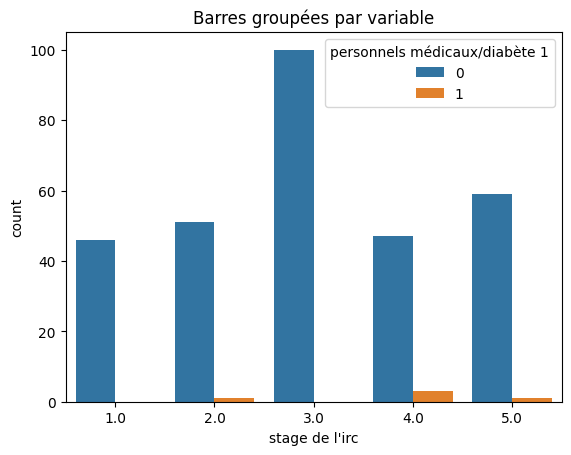

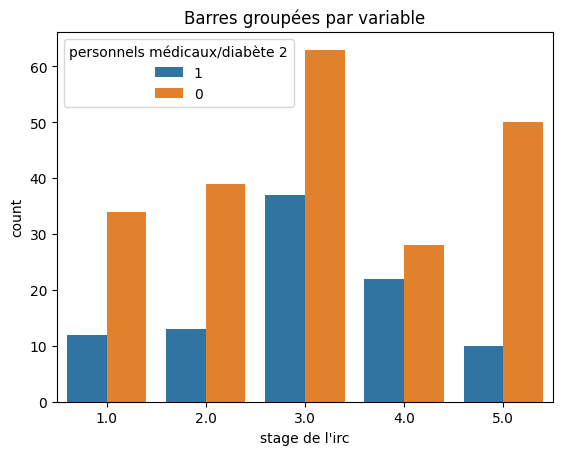

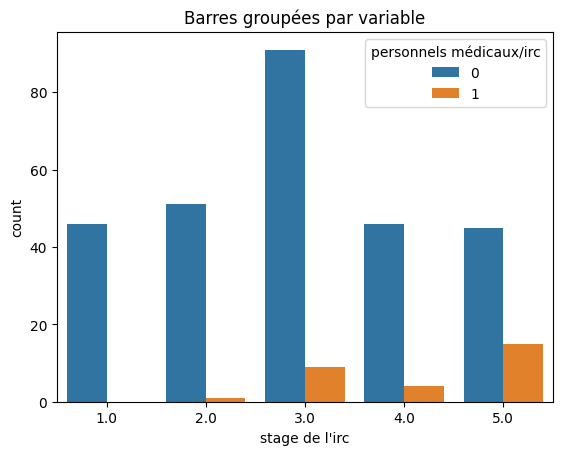

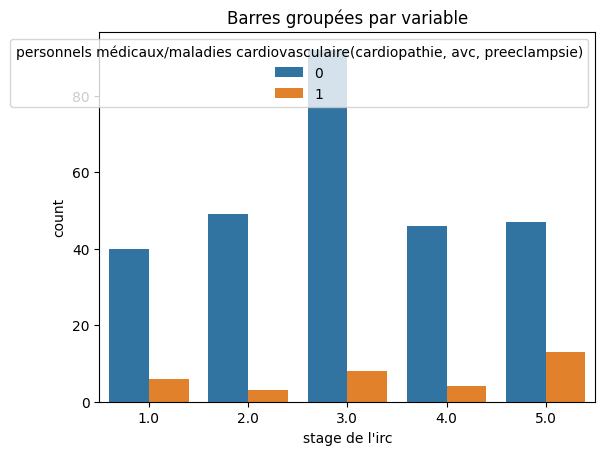

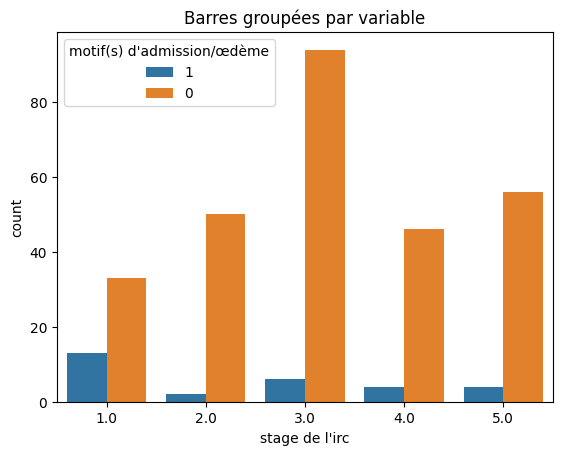

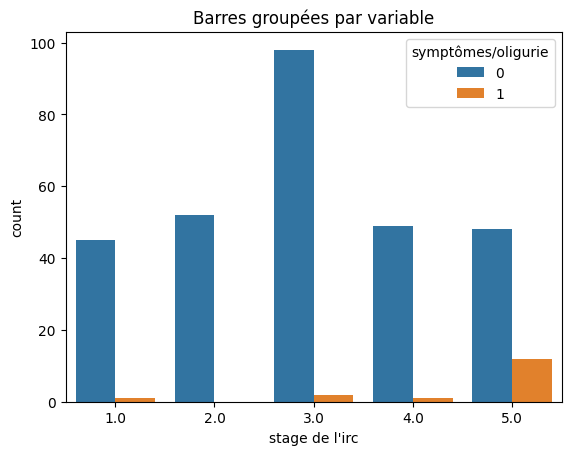

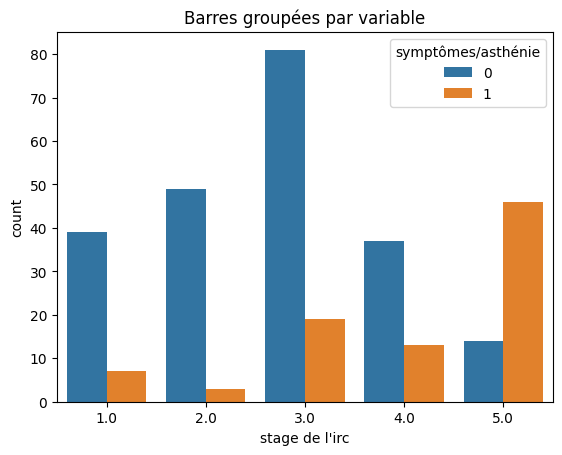

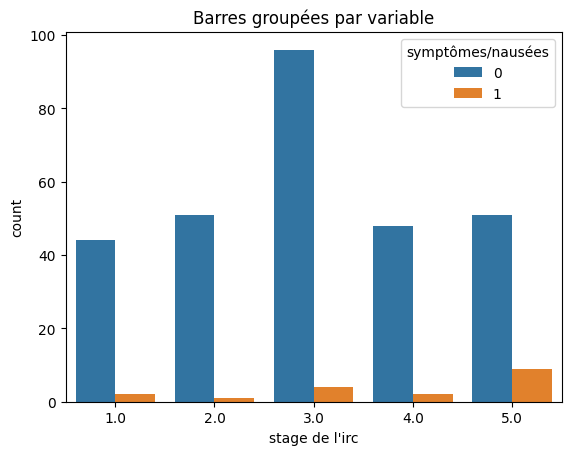

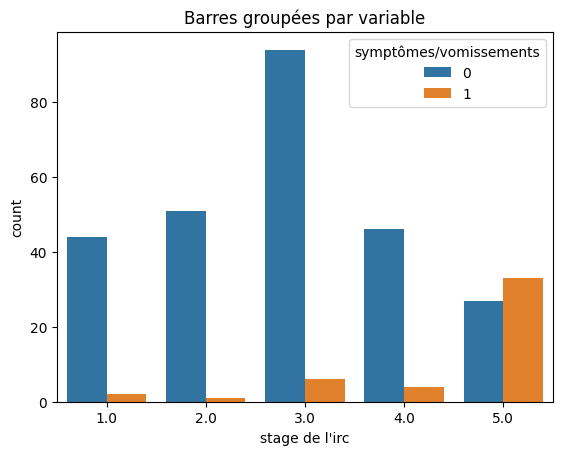

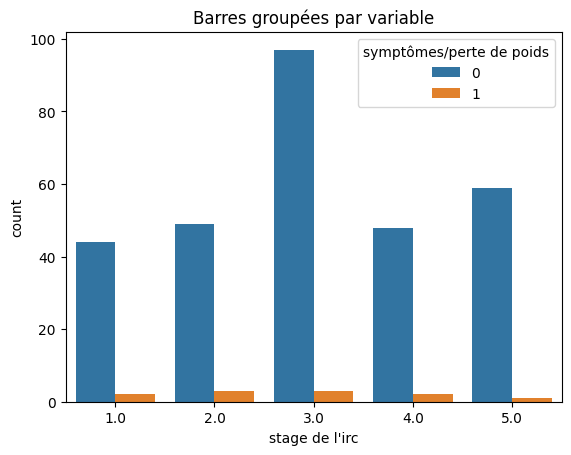

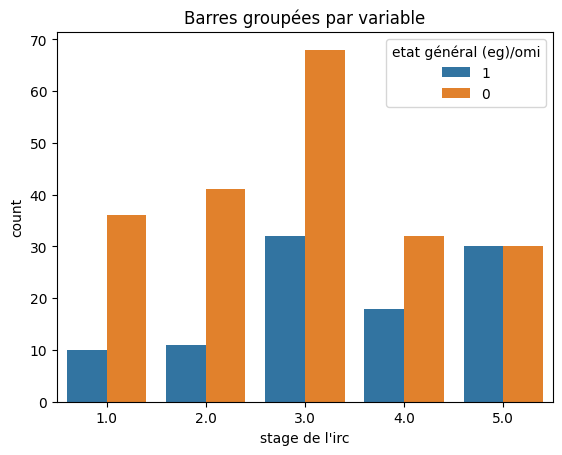

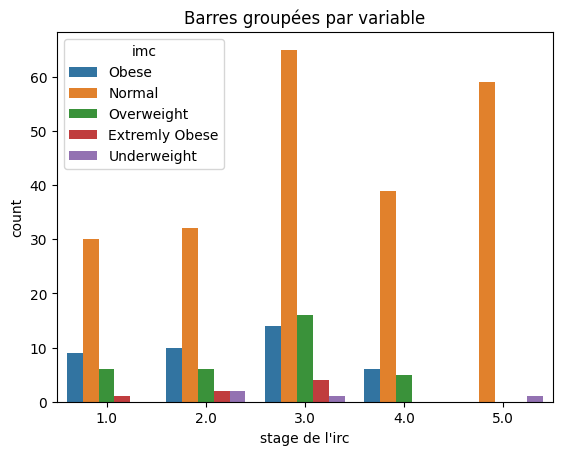

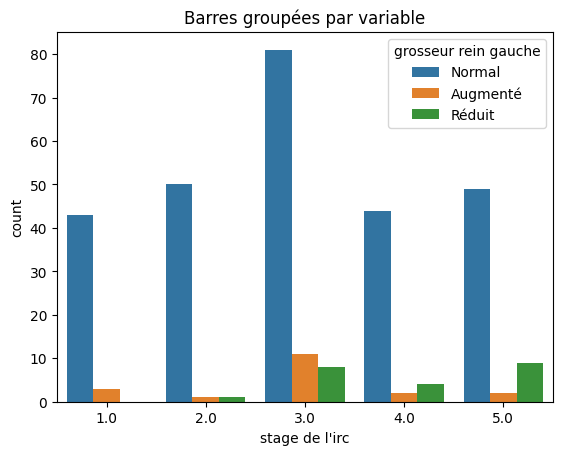

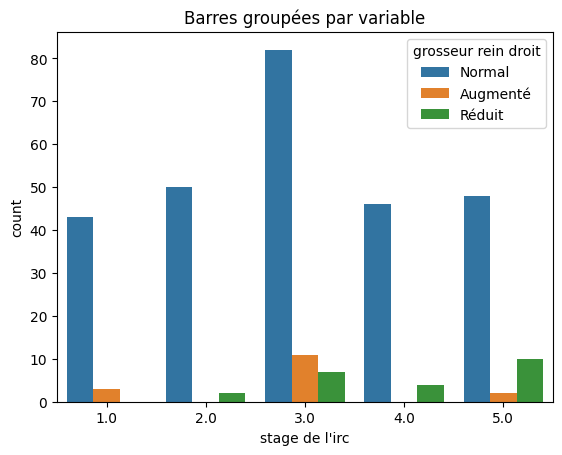

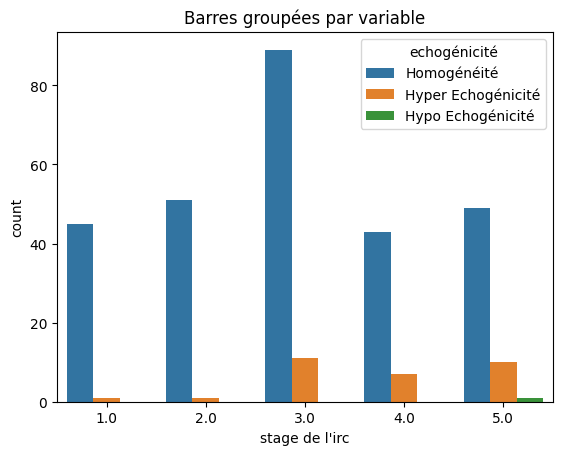

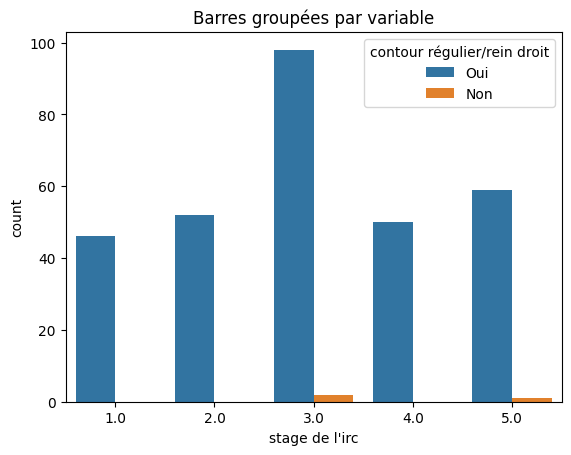

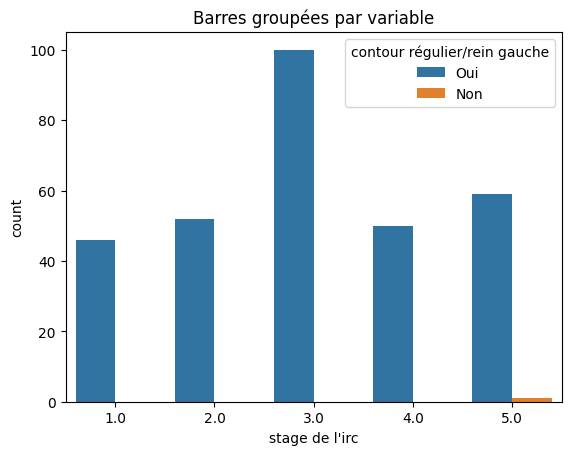

In [158]:
for col in categorical_columns:
    # Check if column exists in DataFrame before plotting
    if col in df.columns:
        sns.countplot(data=df, x="stage de l'irc", hue=col)
        plt.title("Barres groupées par variable")
        plt.show()
    else:
        print(f"Column '{col}' not found in DataFrame, skipping plot.")

#### Principales observations issues de cette phase d'exploration.


1.   La créatinine et le DFGe sont fortement corrélés avec le stade de l'IRC,indiquant leur importance en tant que prédicteurs.
2.  Des symptômes tels que l'asthénie, les vomissements et l'oligurie sont significativement associés au stade de l'IRC.
3.   Des antécédents d'IRC et d'hypertension artérielle (HTA) sont également des facteurs de risque importants.
significativement associés au stade de l'IRC.
4. Le sexe, la perte de poids et la régularité des contours rénaux ne montrent pas d'associations significatives.


Numerisation des colonnes categorielles

In [159]:
for col in categorical_columns:
  print(col,":",df[col].unique())

sexe : ['F' 'M']
personnels médicaux/hta : ['1' '0']
personnels médicaux/diabète 1 : ['0' '1']
personnels médicaux/diabète 2 : ['0' '1']
personnels médicaux/irc : ['1' '0']
personnels médicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie) : ['0' '1']
motif(s) d'admission/œdème : ['0' '1']
symptômes/oligurie : ['0' '1']
symptômes/asthénie : ['0' '1']
symptômes/nausées : ['0' '1']
symptômes/vomissements : ['0' '1']
symptômes/perte de poids : ['0' '1']
etat général (eg)/omi : ['0' '1']
imc : ['Normal' 'Underweight' 'Obese' 'Overweight' 'Extremly Obese']
grosseur rein gauche : ['Normal' 'Augmenté' 'Réduit']
grosseur rein droit : ['Normal' 'Augmenté' 'Réduit']
echogénicité : ['Homogénéité' 'Hyper Echogénicité' 'Hypo Echogénicité']
contour régulier/rein droit : ['Oui' 'Non']
contour régulier/rein gauche : ['Oui' 'Non']


In [160]:
# Convertir les variables binaires (0 ou 1)
binary_cols = [
    'personnels médicaux/hta', 'personnels médicaux/diabète 1', 'personnels médicaux/diabète 2',
    'personnels médicaux/irc', 'personnels médicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)',
    'motif(s) d\'admission/œdème', 'symptômes/oligurie', 'symptômes/asthénie',
    'symptômes/nausées', 'symptômes/vomissements', 'symptômes/perte de poids', 'etat général (eg)/omi'
]
df[binary_cols] = df[binary_cols].astype(int)

# Encodage ordinal pour imc
imc_mapping = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3, 'Extremly Obese': 4}
df['imc'] = df['imc'].map(imc_mapping)

In [161]:
# Encodage ordinal pour la grosseur des reins
size_mapping = {'Réduit': 0, 'Normal': 1, 'Augmenté': 2}
df['grosseur rein gauche'] = df['grosseur rein gauche'].map(size_mapping)
df['grosseur rein droit'] = df['grosseur rein droit'].map(size_mapping)

# Encodage ordinal pour l'échogénicité
echogenicity_mapping = {'Hypo Echogénicité': 0, 'Homogénéité': 1, 'Hyper Echogénicité': 2}
df['echogénicité'] = df['echogénicité'].map(echogenicity_mapping)

# Encodage One-Hot pour le sexe et le contour régulier
df = pd.get_dummies(df, columns=['sexe', 'contour régulier/rein droit', 'contour régulier/rein gauche'], drop_first=True)
df["age"]=df["age"].astype(int)
#  Afficher le DataFrame transformé

In [162]:
df.head(10)

,age,créatinine (mg/l),ta (mmhg)/systole,ta (mmhg)/diastole,personnels médicaux/hta,personnels médicaux/diabète 1,personnels médicaux/diabète 2,personnels médicaux/irc,"personnels médicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)",motif(s) d'admission/œdème,...,na^+ (meq/l),ca^2+ (meq/l),grosseur rein gauche,grosseur rein droit,echogénicité,stage de l'irc,dfge,sexe_M,contour régulier/rein droit_Oui,contour régulier/rein gauche_Oui
0,50,99.888646,140.000,80.000,1,0,0,1,0,0,...,131.000000,82.000000,1,1,1,5.0,4.71,False,True,True
1,28,17.000000,130.000,80.000,0,0,0,0,0,0,...,134.000000,91.942708,1,1,2,5.0,62.22,True,True,True
2,69,48.000000,93.000,52.875,1,0,1,1,0,0,...,139.000000,87.000000,1,1,1,5.0,9.99,False,True,True
3,68,42.000000,130.000,70.000,0,0,0,0,0,1,...,142.000000,88.000000,1,1,1,5.0,15.74,True,True,True
4,68,99.888646,184.875,111.000,1,0,0,1,0,0,...,138.083665,91.942708,1,1,1,5.0,4.15,False,True,True
5,58,99.888646,150.000,80.000,1,0,1,0,1,0,...,130.000000,91.942708,1,1,1,5.0,5.92,True,True,True
6,48,47.755459,108.000,63.000,1,0,1,0,0,0,...,138.083665,91.942708,1,1,1,5.0,15.51,True,True,True
7,41,99.888646,184.875,113.875,0,0,1,1,0,0,...,140.000000,87.000000,1,1,1,5.0,6.68,True,True,True
8,42,99.888646,169.000,111.000,1,0,0,0,1,0,...,141.000000,88.000000,1,1,1,5.0,4.98,False,True,True
9,55,93.000000,110.000,60.000,1,0,1,0,0,0,...,123.000000,85.000000,1,1,1,5.0,4.96,False,True,True


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 307
Data columns (total 27 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   age                                                                             308 non-null    int64  
 1   créatinine (mg/l)                                                               308 non-null    float64
 2   ta (mmhg)/systole                                                               308 non-null    float64
 3   ta (mmhg)/diastole                                                              308 non-null    float64
 4   personnels médicaux/hta                                                         308 non-null    int64  
 5   personnels médicaux/diabète 1                                                   308 non-null    int64  
 6   personnels médicaux/dia

In [164]:

# Renommage des colonnes
df.columns = [
    "age", "creatinine", "ta_systole", "ta_diastole",
    "personnels_medicaux_hta", "personnels_medicaux_diabete_1", "personnels_medicaux_diabete_2",
    "personnels_medicaux_irc", "personnels_medicaux_maladies_cardiovasculaires",
    "motif_admission_oedeme", "symptomes_oligurie", "symptomes_asthenie",
    "symptomes_nausees", "symptomes_vomissements", "symptomes_perte_poids",
    "etat_general_omi", "imc", "na", "ca",
    "grosseur_rein_gauche", "grosseur_rein_droit", "echogenicite",
    "stage_irc", "dfge", "sexe_M",
    "contour_regulier_rein_droit", "contour_regulier_rein_gauche"
]


Variables essentielles :

dfge (Débit de filtration glomérulaire estimé) : Excellent indicateur de la fonction rénale, fortement corrélé négativement au stade de l’IRC.
créatinine (mg/l) : Indicateur clé de la fonction rénale, fortement corrélé positivement au stade de l’IRC.
Variables cliniques et symptômes :

symptômes/asthénie : L’asthénie est un symptôme fréquent de l’IRC, associé de manière significative au stade.
symptômes/vomissements : Les vomissements peuvent être un signe de complications de l’IRC, indiquant une possible aggravation.
symptômes/oligurie : La diminution du volume urinaire (oligurie) est un symptôme caractéristique de l’IRC.
motif(s) d'admission/œdème : Les œdèmes sont fréquents dans l’IRC et peuvent refléter la sévérité de la maladie.
Antécédents médicaux :

personnels médicaux/irc : Des antécédents d’IRC sont un facteur de risque majeur de progression de la maladie.
personnels médicaux/hta : L’hypertension artérielle est à la fois une cause et une conséquence de l’IRC, il est donc pertinent de la prendre en compte.
Variables biologiques et échographiques :

ca^2+ (meq/l) : Le taux de calcium peut être perturbé dans l’IRC, une hypocalcémie étant fréquente dans les stades avancés.
na^+ (meq/l) : Le taux de sodium peut également être affecté dans l’IRC, une hyponatrémie pouvant survenir dans les stades avancés.
grosseur rein droit : La taille des reins peut être modifiée par l’IRC, notamment une réduction de la taille.
grosseur rein gauche : Idem que pour le rein droit.
imc (Indice de masse corporelle) : L’IMC peut être un indicateur de la santé générale et peut être lié à des complications de l’IRC.
Justification du choix :

Forte corrélation avec le stade de l’IRC : Les variables dfge et créatinine (mg/l) sont les plus importantes car elles reflètent directement la fonction rénale.
Importance clinique : Les symptômes, les antécédents médicaux et les variables biologiques/échographiques sélectionnés sont connus pour être associés à l’IRC et à sa progression.
Résultats de vos analyses : Vous avez observé des associations significatives entre ces variables et le stade de l’IRC dans vos analyses exploratoires.

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 📌 1. Séparer les features (X) et la target (y)
target_col = "stage_irc"  # Modifier selon la colonne cible
X = df.drop(columns=[target_col])
y = df[target_col]

# 📌 2. Normalisation des variables numériques
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = Pipeline(steps=[
    ("scaler", StandardScaler())  # Normalisation
])

# 🏗️ 3. Pipeline avec XGBoost
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5,
                                 objective="binary:logistic", random_state=42))
])

# 📌 4. Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train - 1
y_test = y_test - 1

model_pipeline.fit(X_train, y_train)
# 📊 6. Évaluation du modèle
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Précision du modèle : {accuracy:.2%}")
print(classification_report(y_test, y_pred))


🎯 Précision du modèle : 74.19%
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        12
         1.0       0.60      0.55      0.57        11
         2.0       0.76      0.76      0.76        21
         3.0       0.75      1.00      0.86         6
         4.0       0.82      0.75      0.78        12

    accuracy                           0.74        62
   macro avg       0.74      0.76      0.74        62
weighted avg       0.74      0.74      0.74        62



In [169]:
df.columns

Index(['age', 'creatinine', 'ta_systole', 'ta_diastole',
       'personnels_medicaux_hta', 'personnels_medicaux_diabete_1',
       'personnels_medicaux_diabete_2', 'personnels_medicaux_irc',
       'personnels_medicaux_maladies_cardiovasculaires',
       'motif_admission_oedeme', 'symptomes_oligurie', 'symptomes_asthenie',
       'symptomes_nausees', 'symptomes_vomissements', 'symptomes_perte_poids',
       'etat_general_omi', 'imc', 'na', 'ca', 'grosseur_rein_gauche',
       'grosseur_rein_droit', 'echogenicite', 'stage_irc', 'dfge', 'sexe_M',
       'contour_regulier_rein_droit', 'contour_regulier_rein_gauche'],
      dtype='object')

In [174]:
from sklearn.model_selection import cross_val_score

# 📌 1. Séparer les features (X) et la target (y)
target_col = "stage_irc"  # Modifier selon la colonne cible
X = df.drop(columns=[target_col, "ta_diastole", "age", "sexe_M"])
y = df[target_col]

# 📌 2. Normalisation des variables numériques
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = Pipeline(steps=[
    ("scaler", StandardScaler())  # Normalisation
])

# 🏗️ 3. Pipeline avec XGBoost
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5,
                                 objective="binary:logistic", random_state=42))
])

# 📌 4. Cross-validation (validation croisée)
cv_scores = cross_val_score(model_pipeline, X, y - 1, cv=5, scoring='accuracy')  # On utilise `cv=5` pour 5-fold cross-validation

# 🎯 Résultats de la validation croisée
print(f"🎯 Scores de la validation croisée : {cv_scores}")
print(f"🎯 Précision moyenne : {cv_scores.mean():.2%}")


🎯 Scores de la validation croisée : [0.61290323 0.77419355 0.70967742 0.73770492 0.78688525]
🎯 Précision moyenne : 72.43%


In [175]:
print(df["stage_irc"].value_counts())


stage_irc
3.0    100
5.0     60
2.0     52
4.0     50
1.0     46
Name: count, dtype: int64


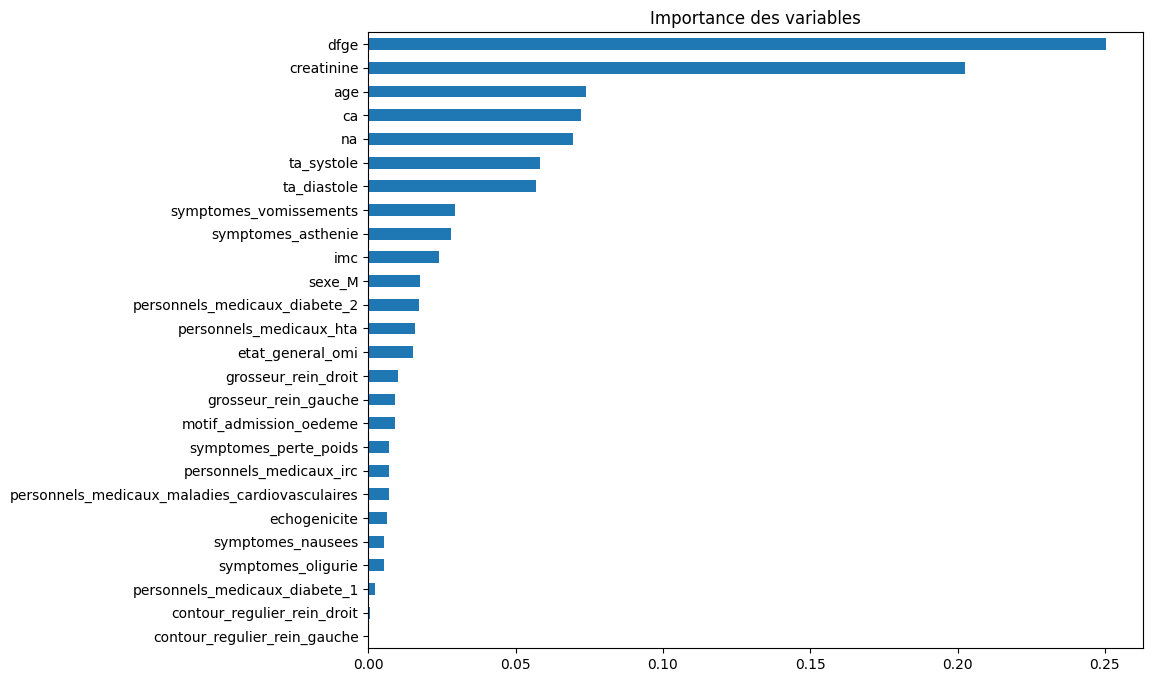

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Exemple : supposer que 'stage de l\'irc' est la variable cible
X = df.drop(columns=["stage_irc"])
y = df["stage_irc"]

# Pour un modèle de classification : binarisation possible ou catégorisation des stades
y = y.astype(int)  # ou autre transformation logique

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Importance des variables
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10,8))
plt.title("Importance des variables")
plt.gca().invert_yaxis()
plt.show()


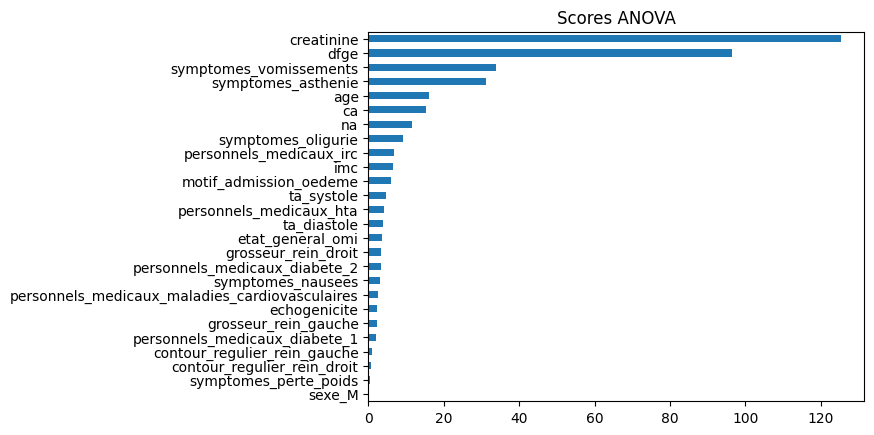

In [179]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Voir les scores
scores = pd.Series(selector.scores_, index=X.columns)
scores.sort_values(ascending=False).plot(kind='barh')
plt.title("Scores ANOVA")
plt.gca().invert_yaxis()
plt.show()


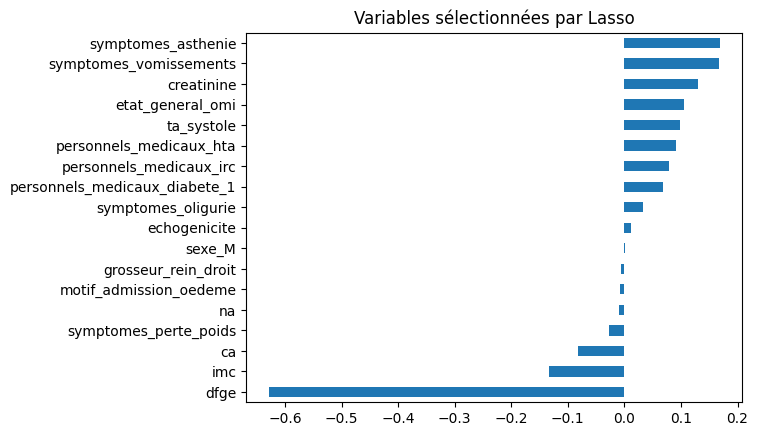

In [180]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5)
lasso.fit(X_scaled, y)

coef = pd.Series(lasso.coef_, index=X.columns)
coef[coef != 0].sort_values().plot(kind="barh")
plt.title("Variables sélectionnées par Lasso")
plt.show()


In [183]:
df.columns

Index(['age', 'creatinine', 'ta_systole', 'ta_diastole',
       'personnels_medicaux_hta', 'personnels_medicaux_diabete_1',
       'personnels_medicaux_diabete_2', 'personnels_medicaux_irc',
       'personnels_medicaux_maladies_cardiovasculaires',
       'motif_admission_oedeme', 'symptomes_oligurie', 'symptomes_asthenie',
       'symptomes_nausees', 'symptomes_vomissements', 'symptomes_perte_poids',
       'etat_general_omi', 'imc', 'na', 'ca', 'grosseur_rein_gauche',
       'grosseur_rein_droit', 'echogenicite', 'stage_irc', 'dfge', 'sexe_M',
       'contour_regulier_rein_droit', 'contour_regulier_rein_gauche'],
      dtype='object')

In [184]:
selected_features = ['creatinine', 'ta_systole', 'personnels_medicaux_hta',
                     'personnels_medicaux_diabete_1', 'personnels_medicaux_diabete_2',
                     'personnels_medicaux_irc',
                     'personnels_medicaux_maladies_cardiovasculaires',
                     'motif_admission_oedeme', 'symptomes_asthenie', 'symptomes_nausees',
                     'symptomes_vomissements', 'symptomes_perte_poids',
                     'etat_general_omi', 'imc', 'na', 'ca',
                     'grosseur_rein_gauche', 'grosseur_rein_droit', 'echogenicite', 'dfge', 'stage_irc']

# Select the columns using the updated list
df = df[selected_features]
df.columns=  ["creatinine","ta_systole","personnels_medicaux_hta","personnels_medicaux_diabete_1","personnels_medicaux_diabete_2","personnels_medicaux_irc","personnels_medicaux_maladies_cardiovasculaire","motif_admission_oedeme","symptomes_asthenie","symptomes_nausees",
              "symptomes_vomissements","symptomes_perte_poids","etat_general_omi","imc","na","ca","grosseur_rein_gauche","grosseur_rein_droit","echogenicite","dfge","stage de l'irc"]

In [ ]:
df.columns

In [185]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# 📌 Séparer X et y
target_col = "stage de l'irc"
X = df.drop(columns=[target_col])  # Ajuste selon pertinence
y = df[target_col].astype(int)  # Assurer que c’est bien un entier

# 🔄 Subtracting 1 from y to make it start from 0
y = y - 1

# 🔀 Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ⚙️ Pipeline complet
pipeline = ImbPipeline(steps=[
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("classifier", XGBClassifier(objective="multi:softmax", num_class=5, eval_metric="mlogloss", use_label_encoder=False))
])

# 🔍 Grille d’hyperparamètres
param_grid = {
    "classifier__n_estimators": [100, 150],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.05, 0.1],
}

# 🔎 GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# ✅ Meilleur modèle
best_model = grid_search.best_estimator_
print("🏆 Meilleurs paramètres :", grid_search.best_params_)

# 📊 Évaluation sur le train set
y_pred = best_model.predict(X_train)

print("✅ Rapport de classification pour le train set :")
print(classification_report(y_train, y_pred))

# 📊 Évaluation sur le test set
y_pred = best_model.predict(X_test)

print("✅ Rapport de classification pour le test :")
print(classification_report(y_test, y_pred))

print("📉 Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🏆 Meilleurs paramètres : {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 150}
✅ Rapport de classification pour le train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        48

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

✅ Rapport de classification pour le test :
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.86      0.55      0.67        11
           2       0.75      0.90      0.82        20
           3       0.73      0.80      0.76        10
           4       1.00     

In [187]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# 📌 Séparer X et y
target_col = "stage de l'irc"
X = df.drop(columns=[target_col])  # Ajuste selon pertinence
y = df[target_col].astype(int)  # Assurer que c’est bien un entier

# 🔄 Subtracting 1 from y to make it start from 0
y = y - 1

# 🔀 Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ⚙️ Pipeline complet
pipeline = ImbPipeline(steps=[
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("classifier", XGBClassifier(objective="multi:softmax", num_class=5, eval_metric="mlogloss", use_label_encoder=False))
])

# 🔍 Grille d’hyperparamètres
param_grid = {
    "classifier__n_estimators": [100],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.05, 0.1],
}

# 🔎 GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# ✅ Meilleur modèle
best_model = grid_search.best_estimator_
print("🏆 Meilleurs paramètres :", grid_search.best_params_)

# 📊 Évaluation sur le train set
y_pred = best_model.predict(X_train)

print("✅ Rapport de classification pour le train set :")
print(classification_report(y_train, y_pred))

# 📊 Évaluation sur le test set
y_pred = best_model.predict(X_test)

print("✅ Rapport de classification pour le test :")
print(classification_report(y_test, y_pred))

print("📉 Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🏆 Meilleurs paramètres : {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
✅ Rapport de classification pour le train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        48

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

✅ Rapport de classification pour le test :
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.86      0.55      0.67        11
           2       0.75      0.90      0.82        20
           3       0.73      0.80      0.76        10
           4       1.00     

In [189]:
import joblib
joblib.dump(best_model, 'AI4CKD_best_model.pkl')

['AI4CKD_best_model.pkl']

In [191]:
X.head()

,creatinine,ta_systole,personnels_medicaux_hta,personnels_medicaux_diabete_1,personnels_medicaux_diabete_2,personnels_medicaux_irc,personnels_medicaux_maladies_cardiovasculaire,motif_admission_oedeme,symptomes_asthenie,symptomes_nausees,symptomes_vomissements,symptomes_perte_poids,etat_general_omi,imc,na,ca,grosseur_rein_gauche,grosseur_rein_droit,echogenicite,dfge
0,99.888646,140.000,1,0,0,1,0,0,0,0,0,0,0,1,131.000000,82.000000,1,1,1,4.71
1,17.000000,130.000,0,0,0,0,0,0,1,0,1,0,1,1,134.000000,91.942708,1,1,2,62.22
2,48.000000,93.000,1,0,1,1,0,0,1,0,0,0,1,1,139.000000,87.000000,1,1,1,9.99
3,42.000000,130.000,0,0,0,0,0,1,0,1,0,0,1,1,142.000000,88.000000,1,1,1,15.74
4,99.888646,184.875,1,0,0,1,0,0,1,0,0,0,1,1,138.083665,91.942708,1,1,1,4.15
